In [1]:
import os
import sys 
sys.path.append(os.path.abspath('..'))
import json
from get_utils import get_data, get_dir
import plot as plot
import matplotlib.pyplot as plt
#%matplotlib widget
#%matplotlib qt
%matplotlib inline



fontsize_label = 18
fontsize_tick = 15
fontsize_legend = 20

save_fig = '/Users/mahdiyar/Diedrichsenlab Dropbox/Mahdiyar Shahbazi/Conferences/NCM2024_Mahdiyar/figures'


In [2]:
model_name = "model{:02d}".format(0)
phase = 'FF2'
ff_coef = 8
folder_name = 'Sim_simple_128'

_,_,loss_file = get_dir(folder_name, model_name, phase, ff_coef=ff_coef)
log = json.load(open(loss_file,'r'))
#log = log['0']
#len(log['0']['position'])

# for loss in log.keys():
#     fig,ax = plot.plot_training_log(log=log,loss_type=loss, w=1)
#     ax.set_title(f"{loss} (w={1})")
#fig.savefig(os.path.join(data_dir,'loss_FF1.png'),dpi=300)

In [2]:
folder_name = 'Sim_all_128'
num_hidden = 128
model_name = "model{:02d}".format(1)


phase = {'NF1':[0],'FF1':[8],'NF2':[0],'FF2':[8]}
ff_coef = [0,8,0,8]#[8,8]
data = get_data(folder_name,model_name,phase,ff_coef,is_channel=False,num_hidden=num_hidden)

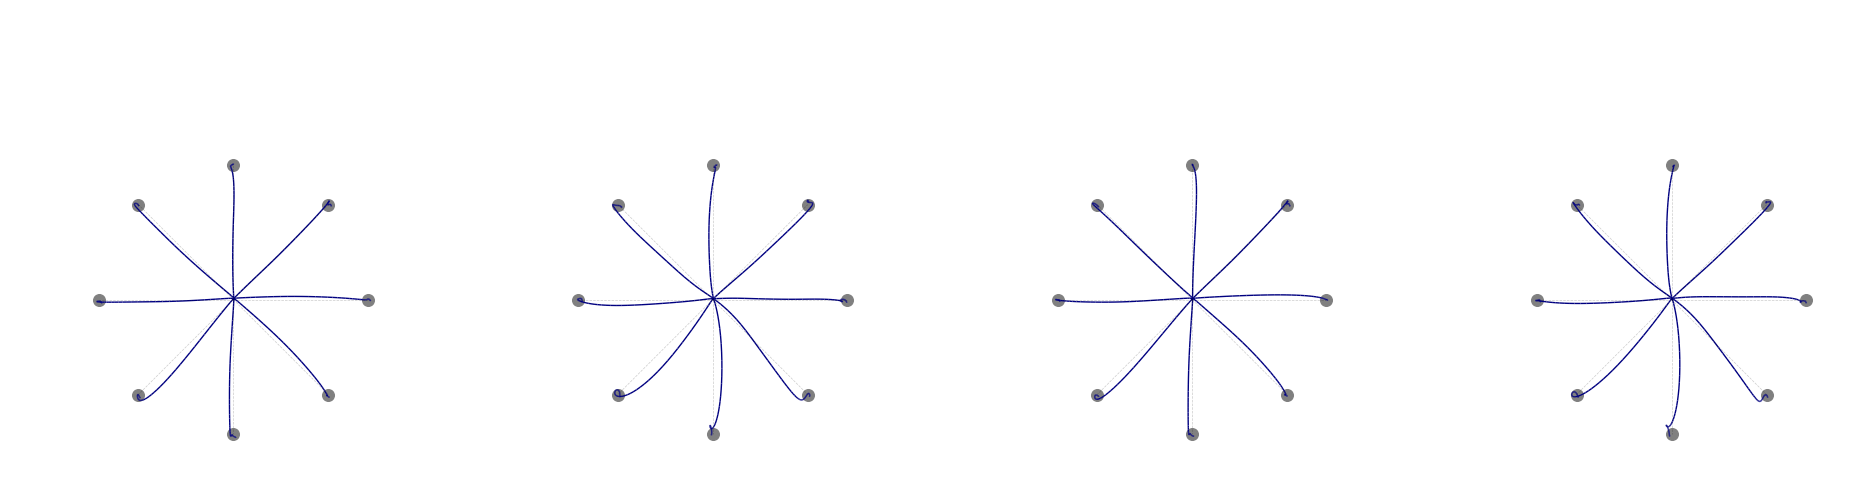

In [3]:
n_phase = len(phase)
fig,ax = plt.subplots(1,n_phase,figsize=(5*n_phase,5))

from matplotlib.colors import ListedColormap
colors = ['navy']
cmap = ListedColormap(colors,'regions',N=1)

if len(phase) == 1:
    ax = [ax]
for i,p in enumerate(phase.keys()):
    plot.plot_simulations(ax[i],xy=data[i]['xy'],target_xy=data[i]['tg'],vel=None,plot_lat=False,cmap=cmap)
    #ax[i].set_title(f'Phase {p}')

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)

    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].tick_params(left = False,bottom = False) 
    ax[i].set_xlabel('', fontsize = fontsize_label)
    ax[i].set_ylabel('', fontsize = fontsize_label)

    # Get all axes in the figure
    all_axes = fig.get_axes()

    # Identify and remove the colorbar axes
    # (assuming the colorbar axes is the last one in the list)
    if len(all_axes) > len(ax):  # More axes present than your main plots
        colorbar_ax = all_axes[-1]  # Assuming the colorbar is the last axes object
        colorbar_ax.remove()

plt.tight_layout()
plt.show()
#fig.savefig(os.path.join(save_fig,'traj_ff_on.pdf'),dpi=300,bbox_inches='tight')

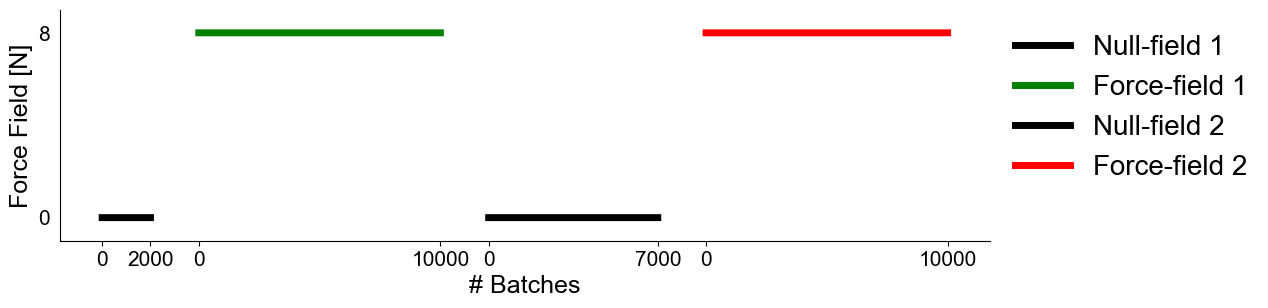

In [53]:
import numpy as np

fontsize_label = 18
fontsize_tick = 15
fontsize_legend = 20


# Data
#n_batches = [20000, 2000, 10000, 7000, 10000]
n_batches = [2000, 10000, 7000, 10000]
force_field = [0, 8, 0, 8]
colors = ['k', 'g', 'k', 'r']
label_name = ['Null-field 1', 'Force-field 1', 'Null-field 2', 'Force-field 2']



# Plot settings
fig,ax = plt.subplots(1,1,figsize=(12, 3))

plt.rcParams['font.family'] = "Arial"


current_x = 0  # Starting point for the first batch
gap = 2000  # Gap between each batch
xticks = []
xticklabels = []

for i, batch_size in enumerate(n_batches):
    # Generate x values for each batch starting from 0
    x = np.arange(0, batch_size)
    y = np.array([force_field[i]] * batch_size)
    
    # Plot the batch
    ax.plot(x + current_x, y, label=label_name[i],color = colors[i],linewidth=2)  # Offset x by current_x
    
    # For x-ticks, show the start and end of each batch range
    xticks.extend([current_x, current_x + batch_size])
    xticklabels.extend(['1', str(batch_size-1)])
    
    current_x += batch_size + gap  # Move to the start of the next batch

# Set custom x-ticks and labels
plt.xticks(ticks=xticks, labels=xticklabels)

plt.ylim(-1,9)
plt.yticks([0,8])



plt.xlabel('# Batches', fontsize = fontsize_label)
plt.ylabel('Force Field [N]', fontsize = fontsize_label)
plt.legend(title = '',frameon = False, bbox_to_anchor= (1,1), fontsize=fontsize_legend)
ax.xaxis.set_tick_params(labelsize=fontsize_tick)
ax.yaxis.set_tick_params(labelsize=fontsize_tick)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tick_params(left = False) 


plt.show()

fig.savefig(os.path.join(save_fig,'training.pdf'),dpi=300,bbox_inches='tight')

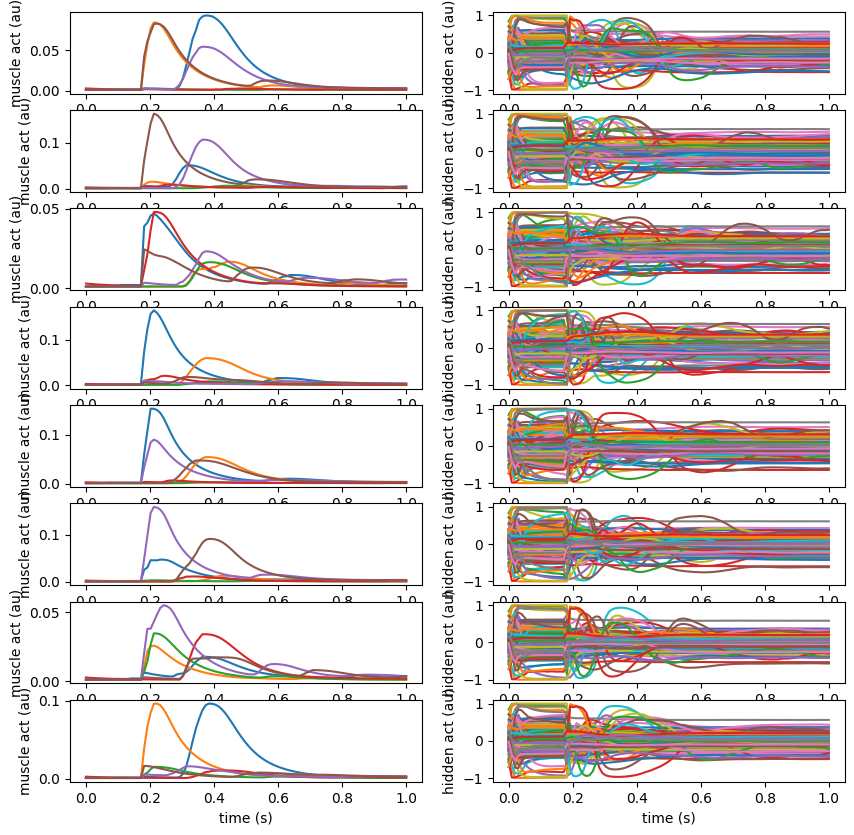

In [4]:
i=1
fig, ax = plot.plot_activation(data[1]['all_hidden'],data[0]['all_muscle'],figsize=(10,10))

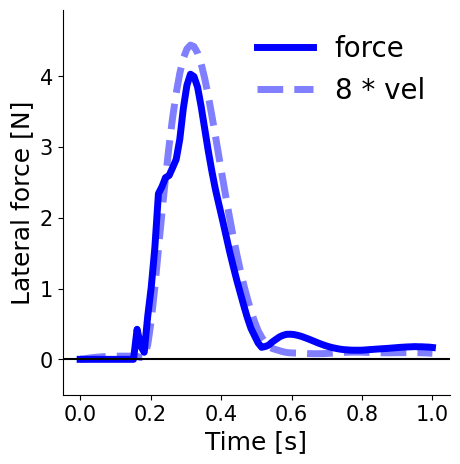

In [6]:
import os
import sys 
sys.path.append(os.path.abspath('..'))
import json
from get_utils import get_data, get_dir
import plot as plot
import matplotlib.pyplot as plt
#%matplotlib widget
#%matplotlib qt
%matplotlib inline



fontsize_label = 18
fontsize_tick = 15
fontsize_legend = 20

save_fig = '/Users/mahdiyar/Diedrichsenlab Dropbox/Mahdiyar Shahbazi/Conferences/NCM2024_Mahdiyar/figures'



import numpy as np
#labels = list(phase.keys())
endpoint_load = np.zeros((8,100))
velocity = np.zeros((8,100))


folder_name = 'Sim_all_128'
num_hidden = 128

n_net = 20

for mn in range(n_net):
    model_name = "model{:02d}".format(1)


    phase = {'FF2':[8]}
    ff_coef = [8]
    data = get_data(folder_name,model_name,phase,ff_coef,is_channel=True,num_hidden=num_hidden)

    endpoint_load = endpoint_load + np.linalg.norm(data[0]['endpoint_load'],axis=2)/n_net
    velocity = velocity + np.linalg.norm(data[0]['vel'],axis=2)/n_net

    #endpoint_load = endpoint_load + np.array(data[0]['endpoint_load'])/n_net
    #velocity = velocity + np.array(data[0]['vel'])/n_net


#endpoint_load = np.linalg.norm(endpoint_load,axis=2)
#velocity = np.linalg.norm(velocity,axis=2)

fg, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))
ax = [ax]

plot.plot_force(ax,endpoint_load.mean(axis=0,keepdims=True),velocity.mean(axis=0,keepdims=True))


ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

plt.xlabel('Time [s]', fontsize = fontsize_label)
plt.ylabel('Lateral force [N]', fontsize = fontsize_label)
plt.legend(title = '',frameon = False, bbox_to_anchor= (1,1), fontsize=fontsize_legend)
ax[0].xaxis.set_tick_params(labelsize=fontsize_tick)
ax[0].yaxis.set_tick_params(labelsize=fontsize_tick)

fg.savefig(os.path.join(save_fig,'lat_force.pdf'),dpi=300,bbox_inches='tight')
#fig.savefig(os.path.join(data_dir,'lat_force.png'),dpi=300)

In [3]:
endpoint_load.mean(axis=0,keepdims=True).shape

(1, 100, 2)

In [1]:
fig, ax = plot.plot_kinematic(data[i]['vel'],data[i]['xy'],data[i]['tg'],figsize=(10,7.5)) # data[i]['vel']
#fig.savefig(os.path.join(data_dir,'kinematic.png'),dpi=300)

NameError: name 'plot' is not defined

In [9]:
labels = list(phase.keys())
fg, ax = plot.plot_epforce(data,labels,figsize=(5,15))